<a href="https://colab.research.google.com/github/cmgpcinthia/Big_Data_Machine_Learning/blob/main/8_2_Clase12N02_linear_regression_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal: práctica y ejercicios

**NOTAS**
 - Hay muchas formas de resolver cada problema, encuentra la tuya.
 - Crea las celdas extra que necesites.
 - Recuerda que una celda puede ser de tipo Código, o de tipo Markdown. Utiliza las segundas para escribir texto y explicaciones si lo precisas.
 - Intenta crear variables a la hora de resolver los ejercicios.
 - Puedes apoyarte en internet: todos los programadores lo hacemos a diario.

Importamos el dataset *california housing*

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [ ]:
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

Para nuestro ejercicio de hoy, vamos a eliminar algunos datos de entrada

In [ ]:
df = df[df.MedHouseVal < 5]

In [ ]:
df.shape

(19648, 9)

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


**El objetivo del ejercicio será predecir `MedHouseVal` en función de otras variables**

**La métrica a optimizar será el root mean squared error (RMSE)**

## Exploración de datos

In [ ]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Cada fila es un bloque de casas de California

Explora el dataset como consideres, acompañándo el análisis de plots univariantes / bivariantes

<Axes: xlabel='MedHouseVal', ylabel='Count'>

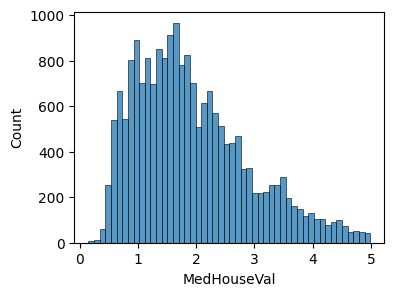

In [ ]:
sns.histplot(df.MedHouseVal)


Presta especial atención a las variables `MedInc`, `HouseAge`, `AveRooms` y `MedHouseVal`

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 3]

In [ ]:
df.corr().style.background_gradient(cmap='Reds', vmin=-1, vmax=0.7)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.195542,0.325739,-0.065418,0.042576,0.026172,-0.078135,-0.008992,0.646719
HouseAge,-0.195542,1.000000,-0.180816,-0.084755,-0.294911,0.015001,0.006083,-0.101740,0.065139
AveRooms,0.325739,-0.180816,1.000000,0.842641,-0.068886,-0.005278,0.121036,-0.029497,0.111581
AveBedrms,-0.065418,-0.084755,0.842641,1.000000,-0.069265,-0.006593,0.073421,0.013105,-0.061480
Population,0.042576,-0.294911,-0.068886,-0.069265,1.000000,0.070084,-0.113457,0.100989,0.013592
AveOccup,0.026172,0.015001,-0.005278,-0.006593,0.070084,1.000000,0.001915,0.002331,-0.021205
Latitude,-0.078135,0.006083,0.121036,0.073421,-0.113457,0.001915,1.000000,-0.924139,-0.149257
Longitude,-0.008992,-0.101740,-0.029497,0.013105,0.100989,0.002331,-0.924139,1.000000,-0.045733
MedHouseVal,0.646719,0.065139,0.111581,-0.061480,0.013592,-0.021205,-0.149257,-0.045733,1.000000


<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

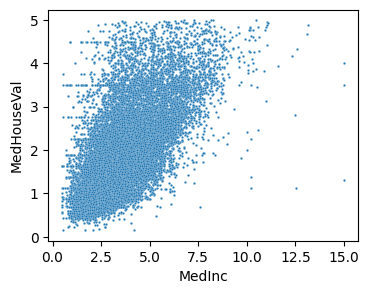

In [ ]:
sns.scatterplot(x=df.MedInc, y=df.MedHouseVal , s=3)

## Modelos predictivos

Queremos predecir `MedHouseVal`

### Monta un modelo dummy

Solemos hacerlo para usarlo como baseline:

consiste en asignar a todos los bloques el precio medio

Evalúa su performance (RMSe)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

### Monta un modelo con un solo predictor: `HouseAge`

Y evalúa su performance

In [ ]:
lr.fit(
    X = df[["HouseAge"]],
    y = df.MedHouseVal,
)

LinearRegression()

In [ ]:
df_temp = df[["HouseAge", "MedHouseVal"]].copy()

In [ ]:
df_temp["Pred_Value"] = lr.predict(df[["HouseAge"]]).round(3)

In [ ]:
df_temp.head()

,HouseAge,MedHouseVal,Pred_Value
0,41.0,4.526,1.984
1,21.0,3.585,1.883
2,52.0,3.521,2.040
3,52.0,3.413,2.040
4,52.0,3.422,2.040


In [ ]:
mse = ((df_temp.MedHouseVal - df_temp.Pred_Value) ** 2).mean().round(3)

In [ ]:
mse

np.float64(0.939)

In [ ]:
rmse = mse ** 0.5

In [ ]:
rmse

np.float64(0.9690201236300513)

### Monta un modelo con un solo predictor: `MedInc`

Y evalúa su performance

In [ ]:
lr.fit(
    X = df[["MedInc"]],
    y = df.MedHouseVal,
)

LinearRegression()

In [ ]:
df_temp = df[["MedInc", "MedHouseVal"]].copy()

In [ ]:
df_temp["Pred_Value"] = lr.predict(df[["MedInc"]]).round(2)

In [ ]:
df_temp.head()

,MedInc,MedHouseVal,Pred_Value
0,8.3252,4.526,3.78
1,8.3014,3.585,3.77
2,7.2574,3.521,3.35
3,5.6431,3.413,2.71
4,3.8462,3.422,1.99


In [ ]:
mse = ((df_temp.MedHouseVal - df_temp.Pred_Value) ** 2).mean().round(3)

In [ ]:
mse

np.float64(0.549)

### Monta un modelo con los 3 predictores `MedInc`, `HouseAge`, `AveRooms`

Y evalúa su performance

In [ ]:
lr.fit(
    X = df[["MedInc","HouseAge","AveRooms"]],
    y = df.MedHouseVal,
)

LinearRegression()

In [ ]:
df_temp = df[["MedInc","HouseAge","AveRooms", "MedHouseVal"]].copy()

In [ ]:
df_temp["Pred_Value"] = lr.predict(df[["MedInc","HouseAge","AveRooms"]]).round(2)

In [ ]:
df_temp.head()

,MedInc,HouseAge,AveRooms,MedHouseVal,Pred_Value
0,8.3252,41.0,6.984127,4.526,4.09
1,8.3014,21.0,6.238137,3.585,3.82
2,7.2574,52.0,8.288136,3.521,3.74
3,5.6431,52.0,5.817352,3.413,3.12
4,3.8462,52.0,6.281853,3.422,2.31


In [ ]:
mse = ((df_temp.MedHouseVal - df_temp.Pred_Value) ** 2).mean().round(3)

In [ ]:
mse

np.float64(0.506)

### Monta un modelo con todas las variables como predictoras

Y evalúa su performance

In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [ ]:
lr.fit(
    X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']],
    y = df.MedHouseVal,
)

LinearRegression()

In [ ]:
df_temp = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', "MedHouseVal"]].copy()

In [ ]:
df_temp["Pred_Value"] = lr.predict(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']]).round(2)

In [ ]:
df_temp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Pred_Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.01
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.90
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.54
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.12
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.30


In [ ]:
df_temp["mse"] = ((df_temp["MedHouseVal"] - df_temp["Pred_Value"])**2).round(2)

In [ ]:
df_temp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Pred_Value,mse
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.01,0.27
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.90,0.10
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.54,0.00
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.12,0.09
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.30,1.26


In [ ]:
rmse = ((df_temp["mse"]).mean()) ** 0.5

In [ ]:
rmse

np.float64(0.6335405880526501)

In [ ]:
df_temp["RMSE"] = df_temp.mse **0.5

In [ ]:
df_temp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Pred_Value,mse,RMSE
1979,4.6250,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.625,7.48,34.28,5.854912
18501,15.0001,52.0,8.461538,1.230769,55.0,2.115385,37.19,-121.59,1.313,6.95,31.78,5.637375
11912,12.5381,29.0,6.888889,1.222222,50.0,2.777778,33.96,-117.44,1.125,5.45,18.71,4.325506
4492,10.2264,52.0,4.800000,0.600000,41.0,4.100000,34.06,-118.22,1.125,4.76,13.21,3.634556
19542,1.7679,39.0,5.000000,0.888889,22.0,2.444444,37.63,-120.92,4.500,0.88,13.10,3.619392


En qué bloques de casas comete mayor error tu modelo?

In [ ]:
df_temp.sort_values(by="RMSE", ascending=False, inplace=True)

In [ ]:
df_temp.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Pred_Value,mse,RMSE
1979,4.6250,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.625,7.48,34.28,5.854912
18501,15.0001,52.0,8.461538,1.230769,55.0,2.115385,37.19,-121.59,1.313,6.95,31.78,5.637375
11912,12.5381,29.0,6.888889,1.222222,50.0,2.777778,33.96,-117.44,1.125,5.45,18.71,4.325506
4492,10.2264,52.0,4.800000,0.600000,41.0,4.100000,34.06,-118.22,1.125,4.76,13.21,3.634556
19542,1.7679,39.0,5.000000,0.888889,22.0,2.444444,37.63,-120.92,4.500,0.88,13.10,3.619392
1913,4.0714,19.0,61.812500,11.000000,112.0,2.333333,39.01,-120.06,4.375,0.80,12.78,3.574913
12458,0.5360,26.0,6.000000,1.000000,5.0,1.666667,33.62,-114.62,2.750,-0.76,12.32,3.509986
1633,2.4444,20.0,6.333333,0.866667,31.0,2.066667,37.88,-122.22,4.750,1.28,12.04,3.469870
4548,7.5752,52.0,3.142857,1.000000,55.0,7.857143,34.02,-118.21,0.675,4.03,11.26,3.355592
4623,0.8804,36.0,2.713235,1.080882,145.0,1.066176,34.06,-118.31,4.500,1.16,11.16,3.340659


In [ ]:
df_temp.tail(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Pred_Value,mse,RMSE
19199,2.1912,42.0,4.122093,1.058140,547.0,3.180233,38.44,-122.70,1.650,1.68,0.0,0.0
2038,1.5449,17.0,4.531599,1.111524,1563.0,2.905204,36.74,-119.69,0.625,0.65,0.0,0.0
2037,2.7813,19.0,5.310476,1.169524,1365.0,2.600000,36.74,-119.67,1.203,1.14,0.0,0.0
2031,1.3343,22.0,3.685585,0.975028,4179.0,4.743473,36.72,-119.75,0.608,0.65,0.0,0.0
17806,5.5429,16.0,6.214421,1.003795,1863.0,3.535104,37.38,-121.87,2.691,2.73,0.0,0.0


In [ ]:
df_temp.shape()

NameError: name 'df_temp' is not defined